# 911 Calls Project

This is was done as a capstone project for a Udemy course called [Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/)

#### Data set: 911 call data 
#### Source: [Kaggle](https://www.kaggle.com/mchirico/montcoalert)
#### The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [40]:
df = pd.read_csv('911.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [42]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** How many null values are there for each column?**

In [43]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          52129
title            0
timeStamp        0
twp            159
addr             0
e                0
dtype: int64

There are many missing values for the zip code column and some for the township column.

** What are the top 5 zipcodes for 911 calls? **

In [44]:
df['zip'].value_counts().head(5)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [45]:
df['twp'].value_counts().head(5)

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

** How many unique title codes are there? **

In [46]:
df['title'].nunique()

141

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [47]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

** What is the most common Reason for a 911 call based off of this new column? **

In [48]:
df['Reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

** Create a countplot of 911 calls by Reason. **

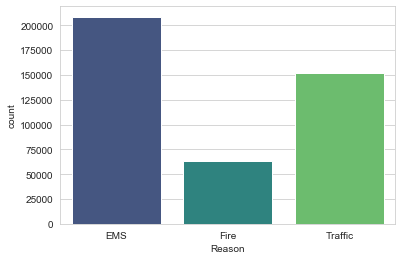

In [49]:
sns.countplot(x='Reason',data=df,palette='viridis');

We can see that fires is not the main reason for 911 calls in our dataset.

** What is the data type of the objects in the timeStamp column? **

In [50]:
type(df['timeStamp'].iloc[0])

str

** Convert the column from strings to DateTime objects. **

In [51]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** Create 3 new columns called Hour, Month, and Day of Week.**

In [52]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

** Map the actual names of weekdays to the day of the week which are integers from 0-6**

In [53]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [54]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [55]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


** Create a countplot of the Day of Week column with the hue based off of the Reason column. **

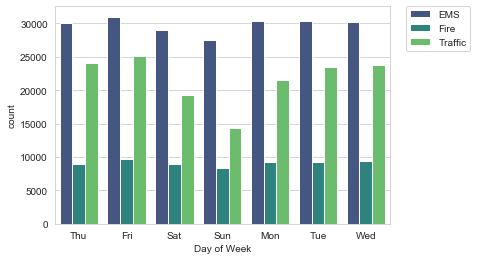

In [56]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis');

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

It seems that the number of 911 calls for Traffic reduces during the weekend. The same pattern can be observed for the emergency calls. However, the fire seems to remain the same during the week.

** Now do the same for Month:**

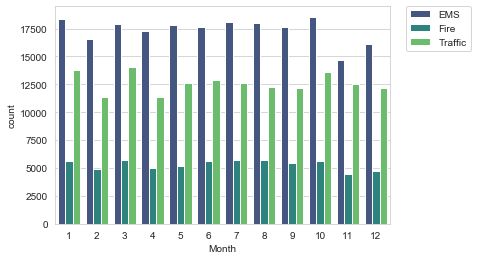

In [57]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis');

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

**It is missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months.**

In [58]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644


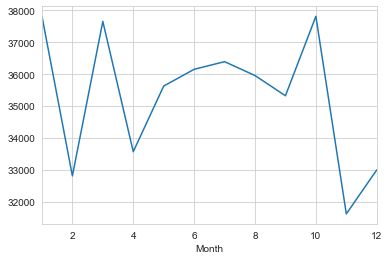

In [59]:
# Could be any column
byMonth['twp'].plot();

A linear regression will give us the general trend and probably a better understanding of the data.

** Create a linear fit on the number of calls per month.**

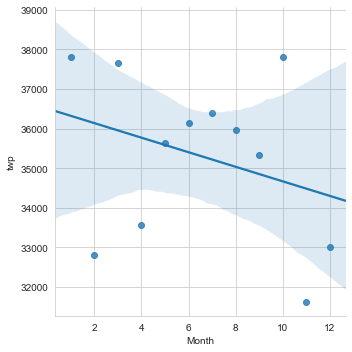

In [60]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index());

**Create a new column called 'Date' that contains the date from the timeStamp column.** 

In [77]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

In [83]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

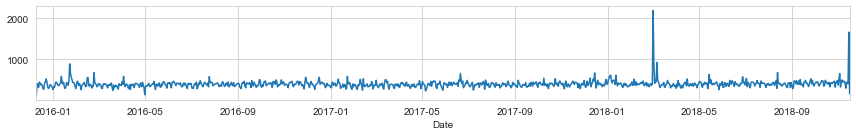

In [78]:
df.groupby('Date').count()['twp'].plot(figsize= (12,2));
plt.tight_layout();

** Or this way: **

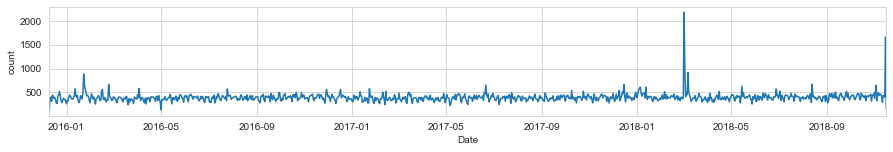

In [79]:
df.groupby('Date').count().plot.line(use_index = True, y = 'title', figsize= (15,2), legend = None);
plt.ylabel('count');

There are some "outliers" which are shown as spikes in the graphs: around March of 2018 and November of 2018

** Recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

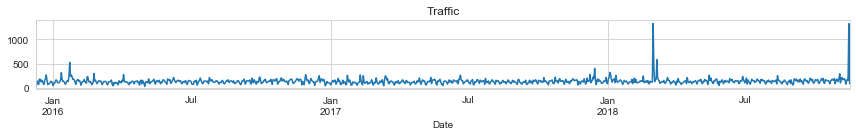

In [95]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot(figsize= (12,2));
plt.title('Traffic');
plt.tight_layout();

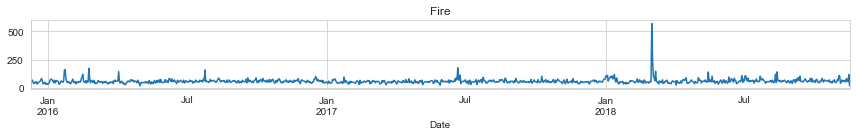

In [96]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot(figsize= (12,2));
plt.title('Fire');
plt.tight_layout();

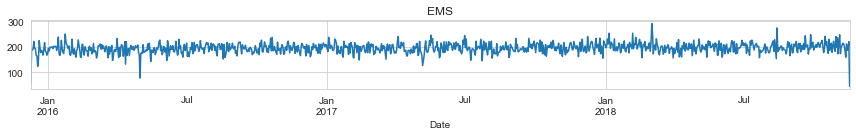

In [97]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot(figsize= (12,2));
plt.title('EMS');
plt.tight_layout();

Looking at EMS, Fire and Traffic we can see that Fire and Traffic spiked on March 2018.

Traffic spiked on November 2018, Fire was around average and EMS dropped which results in a smaller spike for totall 911 call in November 2018.

** Let's look at the total 911 calls and see if we can figure out what happend on those "busy" times **

In [98]:
df['Date'] = pd.to_datetime(df['Date'])

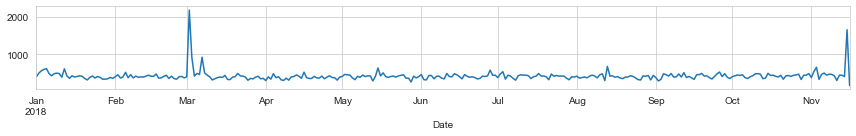

In [99]:
df.groupby(df[df['Date'].dt.year>=2018]['Date']).count()['twp'].plot(figsize= (12,2));
plt.tight_layout();

The spikes happen in March and November. Let's look at the one in March first:

In [100]:
df.groupby(df[(df['Date'].dt.year>= 2018) & (df['Date'].dt.month==3)]['Date']).count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
Date,,,,,,,,,,,,,,
2018-03-01,396,396,396,354,396,396,396,396,396,396,396,396,396,396
2018-03-02,2187,2187,2187,1986,2187,2187,2187,2187,2187,2187,2187,2187,2187,2187
2018-03-03,917,917,917,836,917,917,917,917,917,917,917,917,917,917
2018-03-04,412,412,412,369,412,412,412,412,412,412,412,412,412,412
2018-03-05,484,484,484,439,484,484,484,484,484,484,484,484,484,484
2018-03-06,456,456,456,397,456,456,455,456,456,456,456,456,456,456
2018-03-07,920,920,920,824,920,920,920,920,920,920,920,920,920,920
2018-03-08,499,499,499,449,499,499,499,499,499,499,499,499,499,499
2018-03-09,439,439,439,396,439,439,439,439,439,439,439,439,439,439


We see that on March 2 and 3 (Mostly 2nd) there were many more calls than the rest of the month. Let's see if we can figure out what happened in those days

In [101]:
#Checking the reasons to see if it's distributed according to the entire dataset.
df[df['Date']=='2018-03-02']['Reason'].value_counts()

Traffic    1328
Fire        568
EMS         291
Name: Reason, dtype: int64

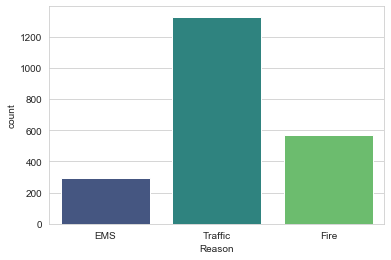

In [104]:
sns.countplot(x='Reason',data=df[df['Date']=='2018-03-02'],palette='viridis');

This is different than the countplot for the entire dataset. The Traffic increased and Fire incidences are more than EMS.

After some quick research, we find that Montgomery county was experiencing extreme weather and power outages on March 2, 2018 which is most likely the cause of the anomoly in this date. (

Look at https://www.pema.pa.gov/about/publicinformation/Daily%20Incident%20Reports/20180303%20Daily%20Report.pdf)

The second spikes is in November 2018:

In [105]:
df.groupby(df[(df['Date'].dt.year>= 2018) & (df['Date'].dt.month==11)]['Date']).count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
Date,,,,,,,,,,,,,,
2018-11-01,374,374,374,325,374,374,374,374,374,374,374,374,374,374
2018-11-02,534,534,534,482,534,534,534,534,534,534,534,534,534,534
2018-11-03,651,651,651,562,651,651,650,651,651,651,651,651,651,651
2018-11-04,323,323,323,281,323,323,323,323,323,323,323,323,323,323
2018-11-05,457,457,457,401,457,457,456,457,457,457,457,457,457,457
2018-11-06,495,495,495,441,495,495,495,495,495,495,495,495,495,495
2018-11-07,439,439,439,389,439,439,439,439,439,439,439,439,439,439
2018-11-08,464,464,464,399,464,464,464,464,464,464,464,464,464,464
2018-11-09,458,458,458,418,458,458,458,458,458,458,458,458,458,458


We see that on November 15 there were many more calls than the rest of the month. Let's see if we can figure out what happened in those days.

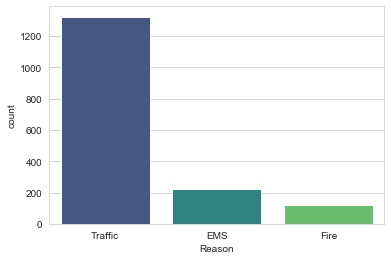

In [106]:
sns.countplot(x='Reason',data=df[df['Date']=='2018-11-15'],palette='viridis');

Aggain, the pattern looks different from that for the entire dataset. Most cases for 911 calls are for Traffic reasons.

According to https://patch.com/pennsylvania/norristown/more-1-200-montgomery-co-peco-customers-without-power: "Heavy snow around the region caused heavy traffic, "hundreds" of accidents, and at least 1,288 outages across Montgomery County."

It is interesting that both outliers are in 2018. Did the weather pattern change so dramatically in this year??!! 
There should be more investigation to see what caused this behaviour in 2018 and not 2016 and 2017.

** Creating heatmaps **

In [107]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1185,1001,930,832,821,1051,1676,2689,3185,3295,...,4150,4514,4711,4489,3616,3254,2789,2445,2210,1866
Mon,1207,974,857,784,871,1124,1729,2829,3588,3685,...,3547,3975,4063,4003,3512,2821,2418,2005,1698,1283
Sat,1515,1332,1206,1012,936,985,1230,1640,2211,2766,...,3479,3284,3348,3274,3174,3036,2632,2432,2073,1913
Sun,1520,1331,1263,1033,954,941,1119,1568,1933,2421,...,2992,2828,2855,2872,2829,2679,2362,1994,1632,1470
Thu,1115,873,920,775,784,1091,1801,2913,3468,3457,...,3904,4139,4053,4412,3578,2923,2579,2230,1784,1486


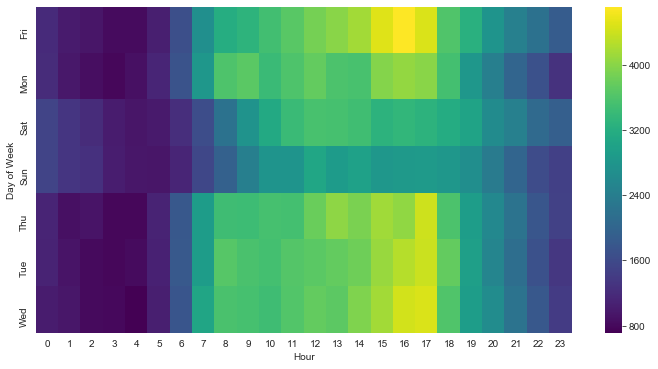

In [108]:
plt.figure(figsize=(12,6));
sns.heatmap(dayHour,cmap='viridis');

Most number of calls happen during the weekdays from 8-17 (working hours) aa ia indicated by yellow colour.

** Create a clustermap using this DataFrame. **

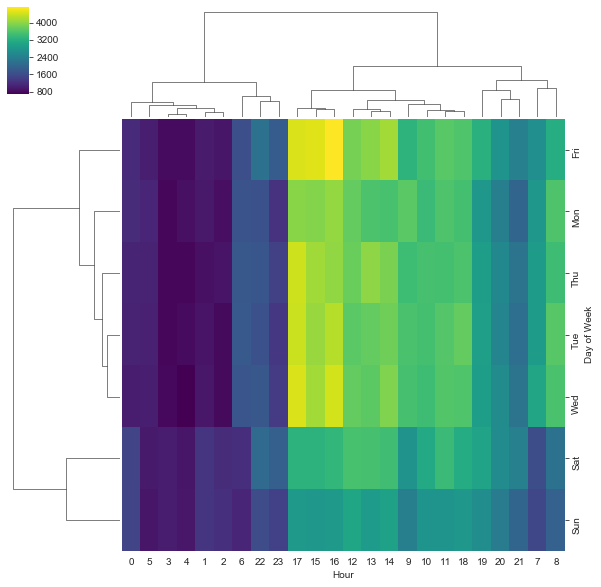

In [110]:
sns.clustermap(dayHour,cmap='viridis');

** Repeat the same plots for a DataFrame that shows the Month as the column. **

In [111]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,5532,4848,7344,5195,4989,5867,5380,5312,6010,5179,4525,5570
Mon,5716,5214,4663,5154,5019,5045,5792,5212,4675,6385,4157,4286
Sat,5103,4431,4914,4947,4275,4868,4883,4355,5023,5051,4043,5200
Sun,4882,3806,3569,4628,3940,4019,5114,3963,4245,4852,3210,3896
Thu,4985,4708,6010,4637,5469,5951,4954,5328,5300,4940,5978,4899


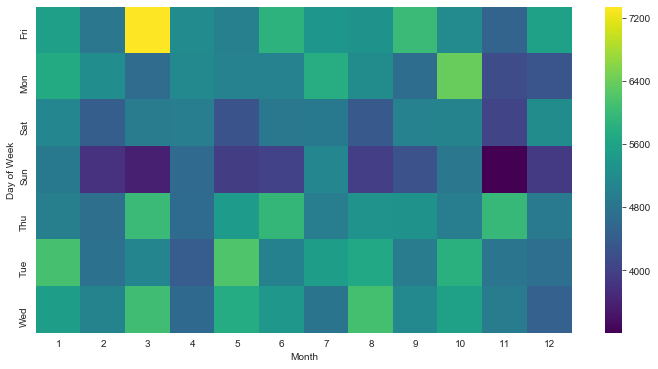

In [112]:
plt.figure(figsize=(12,6));
sns.heatmap(dayMonth,cmap='viridis');

The highest number is on a Friday in March, which is influenced by the harsh weather condition mentioned earlier. 

Despite our expectation, we don't see a high density for the month of November. This can be because the data is up to November 15 which makes us to use that part of the dataset with cautious.

In addition, Sundays are generally pretty quiet!!

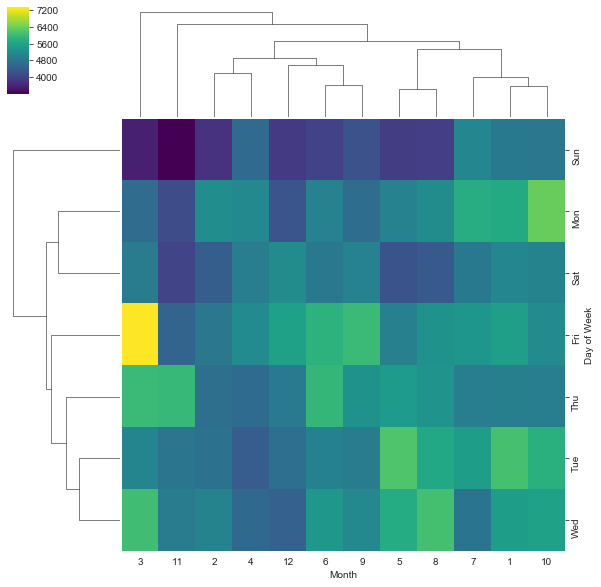

In [114]:
sns.clustermap(dayMonth,cmap='viridis');

## Conclusion

In this capstone project we used Pandas to read the csv file as a dataframes, reorganize it, and extract new features form it. Using both Pandas and Seaborn we visualized the dateset. 

What we found: 

Most 911 calls are due to 
1. Emergency
2. Traffic
3. Fire

On March 2, 2018 and November 15, 2018, two anomolies were observed, both of which were related to sever weather conditions.